In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# loading the data set

df = pd.read_excel('/content/asbl_data_analyst_interview_assignment_netflix.xlsx' )

In [6]:
# check the top rows of dataset
df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."


In [7]:
# check the shape of the dataset
df.shape

(8807, 7)

In [8]:
#check the columns of the dataset
df.columns

Index(['Type', 'Title', 'Director', 'Cast', 'Country', 'Release_year',
       'Genres'],
      dtype='object')

In [9]:
# cehck the dattypes of the columns
df.dtypes

Type            object
Title           object
Director        object
Cast            object
Country         object
Release_year     int64
Genres          object
dtype: object

In [13]:
df.info

<bound method DataFrame.info of          Type                  Title         Director  \
0       Movie   Dick Johnson Is Dead  Kirsten Johnson   
1     TV Show          Blood & Water              NaN   
2     TV Show              Ganglands  Julien Leclercq   
3     TV Show  Jailbirds New Orleans              NaN   
4     TV Show           Kota Factory              NaN   
...       ...                    ...              ...   
8802    Movie                 Zodiac    David Fincher   
8803  TV Show            Zombie Dumb              NaN   
8804    Movie             Zombieland  Ruben Fleischer   
8805    Movie                   Zoom     Peter Hewitt   
8806    Movie                 Zubaan      Mozez Singh   

                                                   Cast        Country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...      

In [11]:
# check the  descriptive statistics 

df.describe()

,Release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
# check the missing values

df.isnull().sum()

Type               0
Title              0
Director        2634
Cast             825
Country          831
Release_year       0
Genres             0
dtype: int64

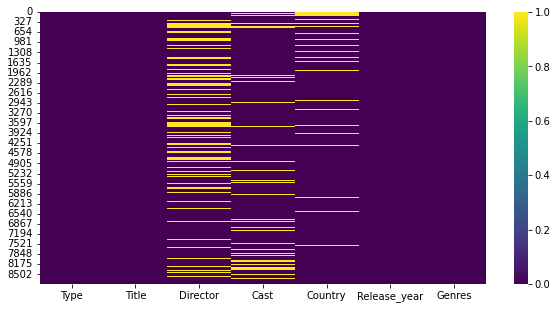

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

# PLOTTING GRAPHS

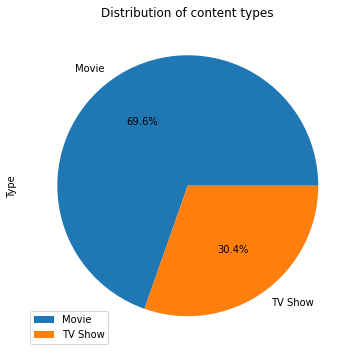

In [16]:
# Distribution of content types
plt.figure(figsize=(6,6))
df['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of content types')
plt.legend()
plt.show()


we can see that netflix has majority of movies than tv shows as content.

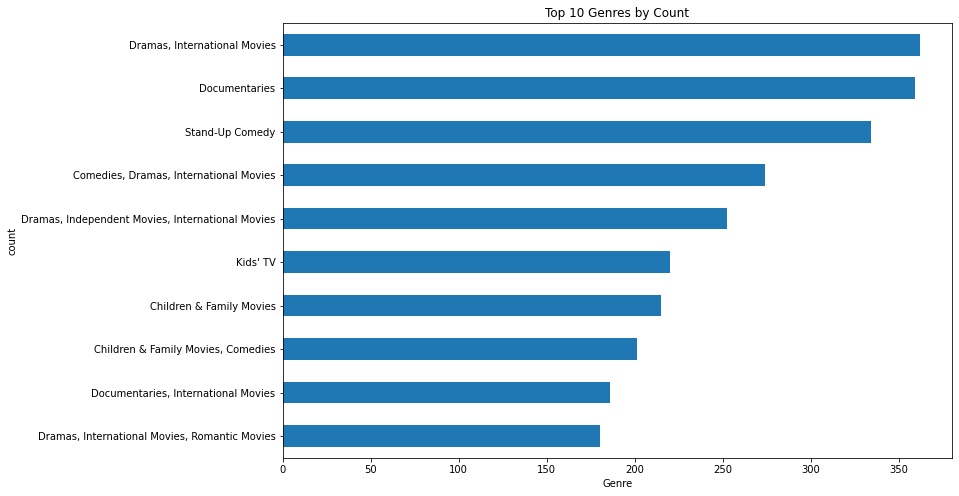

In [32]:
# this graph gives us the top 10 genres in netflix 
plt.figure(figsize=(12, 8))
df["Genres"].value_counts().head(10).sort_values().plot(kind="barh")
plt.title("Top 10 Genres by Count")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()


Dramas, documentaries and international movies are one of the top genres on netflix

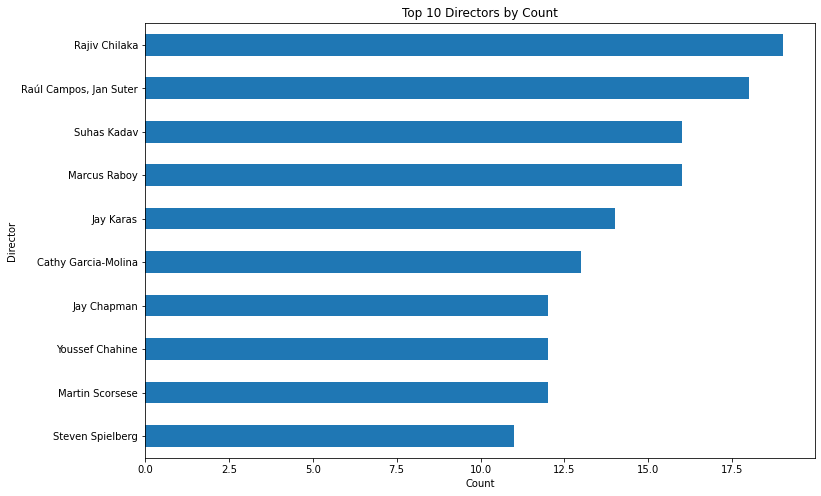

In [38]:
# Top 10 directors by count
plt.figure(figsize=(12, 8))
df["Director"].value_counts().head(10).sort_values().plot(kind="barh")
plt.title("Top 10 Directors by Count")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

these are the top 10 directors on netflix who have more content.



---



---



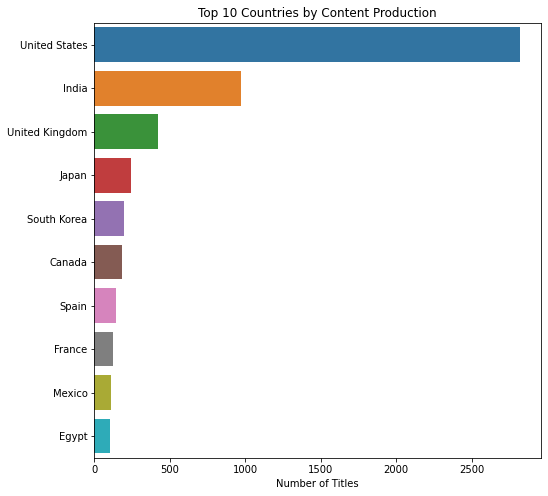

In [43]:
# Top countries by production
plt.figure(figsize= (8,8))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Number of Titles')
plt.show()

We can see united states produce more content on netflix. And secondly India 

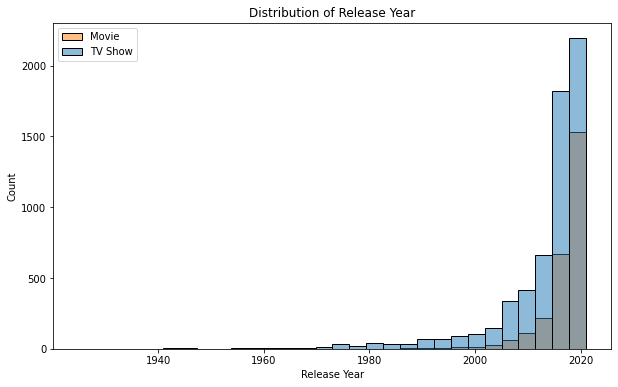

In [37]:
# Distribution of release year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Release_year', hue='Type', alpha=0.5, bins=30)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Year')
plt.legend(['Movie', 'TV Show'])
plt.show()

we can see that more movies were released in the year 2020 than compared to tv shows

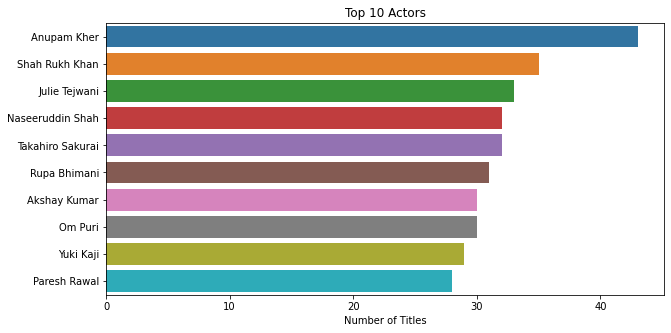

In [49]:

# top 10 actors with most number of movies or movie titles
plt.figure(figsize=(10,5))
actors_df = df['Cast'].str.split(', ', expand=True).stack().reset_index(drop=True, level=1).rename('actor')
top_actors = actors_df.value_counts().head(10)
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors')
plt.xlabel('Number of Titles')
plt.show()

Anupam kher has most number of movie titles in netflix.



---



---



a. Which are the top 5 directors who produce most of the movies only?

In [50]:
top_directors = df[df['Type'] == 'Movie']['Director'].value_counts().head(5)
print(top_directors)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Name: Director, dtype: int64




---





b. Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix (you can find a count for each genre and list the top 5 genres) for movies and TV shows?

In [51]:
top_genres = df['Genres'].value_counts().head(5)
print(top_genres)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: Genres, dtype: int64




---



---


c. Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years?

In [52]:
# convert release_year to datetime format
df['Release_year'] = pd.to_datetime(df['Release_year'], format='%Y')

# group data by director and release year
grouped = df.groupby(['Director', pd.Grouper(key='Release_year', freq='Y')])

# count number of movies/TV shows each director has released in each year
counts = grouped['Type'].count()

# calculate percentage change in the number of movies/TV shows released by each director between the first and last year of the data
percentage_change = (counts.groupby('Director').last() - counts.groupby('Director').first()) / counts.groupby('Director').first() * 100

# sort values in descending order and take the top 2 directors
top_directors = percentage_change.sort_values(ascending=False).head(2)
print(top_directors)


Director
Hidenori Inoue    400.0
Matt Askem        300.0
Name: Type, dtype: float64




---



---


d. Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform?

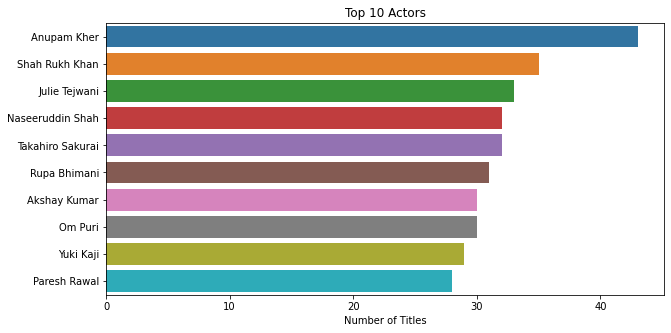

In [56]:
plt.figure(figsize=(10,5))
actors_df = df['Cast'].str.split(', ', expand=True).stack().reset_index(drop=True, level=1).rename('actor')
top_actors = actors_df.value_counts().head(10)
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors')
plt.xlabel('Number of Titles')
plt.show()






---



e. Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]

<ipython-input-65-55bffe182584>:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['Release_year'] = df['Release_year'].astype(int)


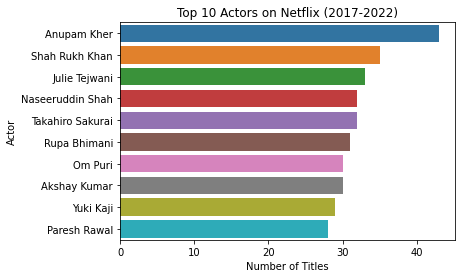

In [65]:
# Convert release year to integer
df['Release_year'] = df['Release_year'].astype(int)

# Filter data for the past 5 years
recent_data = df[df['Release_year'] >= 2017]

# Split cast names and count occurrences
actor_counts = pd.Series(recent_data['Cast'].str.split(', ').explode().value_counts())

# Select top 10 actors
top_actors = actor_counts.head(10)

# Plot bar chart
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors on Netflix (2017-2022)')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()




Anupam kher and shahrukh khan have most number of movies on netflix. so netflix should collaborate with these actors more.



---



---

